In [27]:
# !pip install torch torchvision numpy 
# !pip install torchsummary torchmetrics  
# !pip install torchmetrics torchinfo

In [28]:
import funcs
import torch
import torchvision.transforms as transform
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.optim import SGD,Adam
import torch.functional as F
from torch.utils.data import random_split,DataLoader
import os
import networks
from torchsummary import summary

In [29]:
device = funcs.get_GPU()
device
# Paths
PATH = '/Users/sai/Desktop/Paper'
checkpoints_path = 'checkpoints_teacher/'
if not os.path.exists(checkpoints_path):
    os.mkdir(checkpoints_path)
IMAGE_SHAPE = (28,28)

In [30]:
train_transform = transform.Compose([transform.ToTensor(),
                                     transform.Normalize((0.5,0.5),(0.5,0.5))]
)

test_transform = transform.Compose([transform.ToTensor(),
                                     transform.Normalize((0.5,0.5),(0.5,0.5))]
)

In [31]:
train_val_dataset = tv.datasets.MNIST(root=PATH,
                                      train=True,
                                      transform=transform.ToTensor(),
                                      download=True,target_transform=None)
test_dataset = tv.datasets.MNIST(root=PATH,
                                      train=False,
                                      transform=transform.ToTensor(),
                                      download=True,target_transform=None)

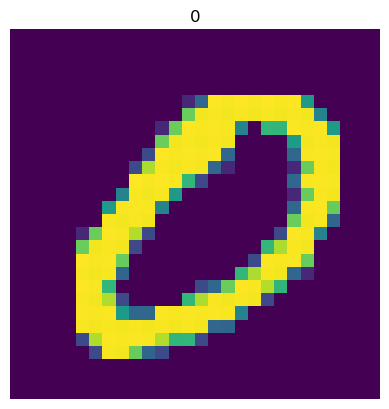

In [32]:
funcs.visualise(train_val_dataset)

In [33]:
total_size = len(train_val_dataset)
val_size = int(total_size * 0.05)
train_size =  total_size - val_size

train_subset,val_subset = random_split(train_val_dataset,[train_size,val_size])

In [34]:

train_dataloader = DataLoader(train_subset,batch_size=128,shuffle=True,num_workers=(os.cpu_count()//2))
val_loader = DataLoader(val_subset,batch_size=128,shuffle=False,num_workers=(os.cpu_count()//2))
test_loader = DataLoader(test_dataset,batch_size=128,shuffle=False,num_workers=(os.cpu_count()//2))

In [35]:
hparam = {'dropout_input': 0.0,
 'dropout_hidden': 0.0,
 'weight_decay': 1e-05,
 'lr_decay': 0.95,
 'momentum': 0.9,
 'lr': 0.01}

In [36]:
model = networks.TeacherModel()
summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
           Dropout-2                  [-1, 784]               0
            Linear-3                 [-1, 1200]         942,000
              ReLU-4                 [-1, 1200]               0
           Dropout-5                 [-1, 1200]               0
            Linear-6                 [-1, 1200]       1,441,200
              ReLU-7                 [-1, 1200]               0
           Dropout-8                 [-1, 1200]               0
            Linear-9                   [-1, 10]          12,010
Total params: 2,395,210
Trainable params: 2,395,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.07
Params size (MB): 9.14
Estimated Total Size (MB): 9.21
---------------------------------------

In [37]:
model.parameters


<bound method Module.parameters of TeacherModel(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.0, inplace=False)
    (2): Linear(in_features=784, out_features=1200, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.0, inplace=False)
    (5): Linear(in_features=1200, out_features=1200, bias=True)
    (6): ReLU()
    (7): Dropout(p=0.0, inplace=False)
    (8): Linear(in_features=1200, out_features=10, bias=True)
  )
)>

In [38]:

epochs = 30
for epoch in range(epochs):
    train_loss, train_acc = funcs.train(model=model,dataset=train_dataloader,hparams=hparam,epoch=epoch,device=device)
    save_path = checkpoints_path +  'Teacher_final.tar'
    torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'loss': train_loss}, save_path)
    validation_loss,validation_acc = funcs.evaluate_model(model=model,dataset=val_loader,epoch=epoch,device=device)

Epoch: 1, training loss: 2.3060593605041504
Epoch: 1, training loss: 2.275689125061035
Epoch: 1, training loss: 2.203773021697998
Epoch: 1, training loss: 2.1421871185302734
Epoch: 1, training loss: 1.9737917184829712
Epoch: 1, training loss: 1.8010097742080688
Epoch: 1, training loss: 1.5554757118225098
Epoch: 1, training loss: 1.23189115524292
Epoch: 1, training loss: 0.9439579844474792
Epoch: 1, training loss: 0.8206731081008911
Epoch: 1, training loss: 0.7280183434486389
Epoch: 1, training loss: 0.7542275786399841
Epoch: 1, training loss: 0.4896538555622101
Epoch: 1, training loss: 0.45811113715171814
Epoch: 1, training loss: 0.5643460750579834
Epoch: 1, training loss: 0.41173332929611206
Epoch: 1, training loss: 0.4397623538970947
Epoch: 1, training loss: 0.42940065264701843
Epoch: 1, training loss: 0.40832632780075073
Epoch: 1, training loss: 0.5714909434318542
Epoch: 1, training loss: 0.3413066565990448
Epoch: 1, training loss: 0.3847726285457611
Epoch: 1, training loss: 0.20263

In [39]:

_ , test_accuracy = funcs.evaluate_model(model=model,dataset=test_loader,device=device)
print('test accuracy: ', test_accuracy)

Epoch: 1, AVG Loss: 0.0004937030494009377, accuracy per epoch: 98.19
test accuracy:  98.19
